DeTR model with ResNet-5 backbone.
* This model has been trained end-to-end on COCO2017 object detection with 118k images, and 100 objects.

In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torchvision import transforms
import matplotlib.pyplot as plt
from PIL import Image
import io
from datasets import load_dataset, DatasetDict
from transformers import Trainer, TrainingArguments

In [10]:
from PIL import ImageDraw

Loading dataset

In [2]:
data=load_dataset('cppe-5')
data

README.md:   0%|          | 0.00/11.2k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/237M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/4.14M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/29 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['image_id', 'image', 'width', 'height', 'objects'],
        num_rows: 1000
    })
    test: Dataset({
        features: ['image_id', 'image', 'width', 'height', 'objects'],
        num_rows: 29
    })
})

In [23]:
categories=data['train'].features['objects'].feature['category'].names
categories

['Coverall', 'Face_Shield', 'Gloves', 'Goggles', 'Mask']

In [3]:
data['train'][0]

{'image_id': 15,
 'image': <PIL.Image.Image image mode=RGB size=943x663>,
 'width': 943,
 'height': 663,
 'objects': {'id': [114, 115, 116, 117],
  'area': [3796, 1596, 152768, 81002],
  'bbox': [[302.0, 109.0, 73.0, 52.0],
   [810.0, 100.0, 57.0, 28.0],
   [160.0, 31.0, 248.0, 616.0],
   [741.0, 68.0, 202.0, 401.0]],
  'category': [4, 4, 0, 0]}}

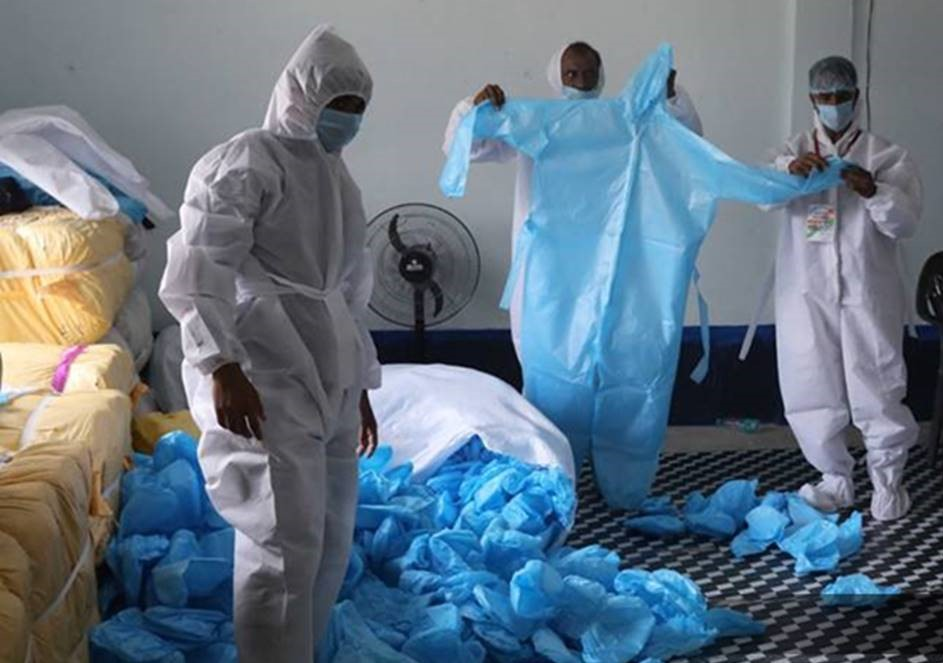

In [12]:
data['train'][0]['image']

In [5]:
data['train'][0]['objects']

{'id': [114, 115, 116, 117],
 'area': [3796, 1596, 152768, 81002],
 'bbox': [[302.0, 109.0, 73.0, 52.0],
  [810.0, 100.0, 57.0, 28.0],
  [160.0, 31.0, 248.0, 616.0],
  [741.0, 68.0, 202.0, 401.0]],
 'category': [4, 4, 0, 0]}

Visualization

In [27]:
sample=data['train'][np.random.randint(0,100)]
sample

{'image_id': 55,
 'image': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1456x793>,
 'width': 696,
 'height': 421,
 'objects': {'id': [460, 461, 462, 463, 464, 465, 466, 467],
  'area': [154240, 154574, 33166, 40392, 30996, 46375, 271196, 627183],
  'bbox': [[686.0, 108.0, 320.0, 482.0],
   [328.0, 290.0, 362.0, 427.0],
   [393.0, 501.0, 206.0, 161.0],
   [768.0, 352.0, 204.0, 198.0],
   [733.0, 277.0, 252.0, 123.0],
   [294.0, 439.0, 371.0, 125.0],
   [251.0, 189.0, 449.0, 604.0],
   [653.0, 10.0, 801.0, 783.0]],
  'category': [1, 1, 4, 4, 3, 3, 0, 0]}}

In [28]:
id2label={idx:lb for idx, lb in enumerate(categories)}
label2id={lb:idx for idx, lb in enumerate(categories)}

In [29]:
id2label

{0: 'Coverall', 1: 'Face_Shield', 2: 'Gloves', 3: 'Goggles', 4: 'Mask'}

In [30]:
sample

{'image_id': 55,
 'image': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1456x793>,
 'width': 696,
 'height': 421,
 'objects': {'id': [460, 461, 462, 463, 464, 465, 466, 467],
  'area': [154240, 154574, 33166, 40392, 30996, 46375, 271196, 627183],
  'bbox': [[686.0, 108.0, 320.0, 482.0],
   [328.0, 290.0, 362.0, 427.0],
   [393.0, 501.0, 206.0, 161.0],
   [768.0, 352.0, 204.0, 198.0],
   [733.0, 277.0, 252.0, 123.0],
   [294.0, 439.0, 371.0, 125.0],
   [251.0, 189.0, 449.0, 604.0],
   [653.0, 10.0, 801.0, 783.0]],
  'category': [1, 1, 4, 4, 3, 3, 0, 0]}}

In [41]:
sample['objects']['category'][i]

1

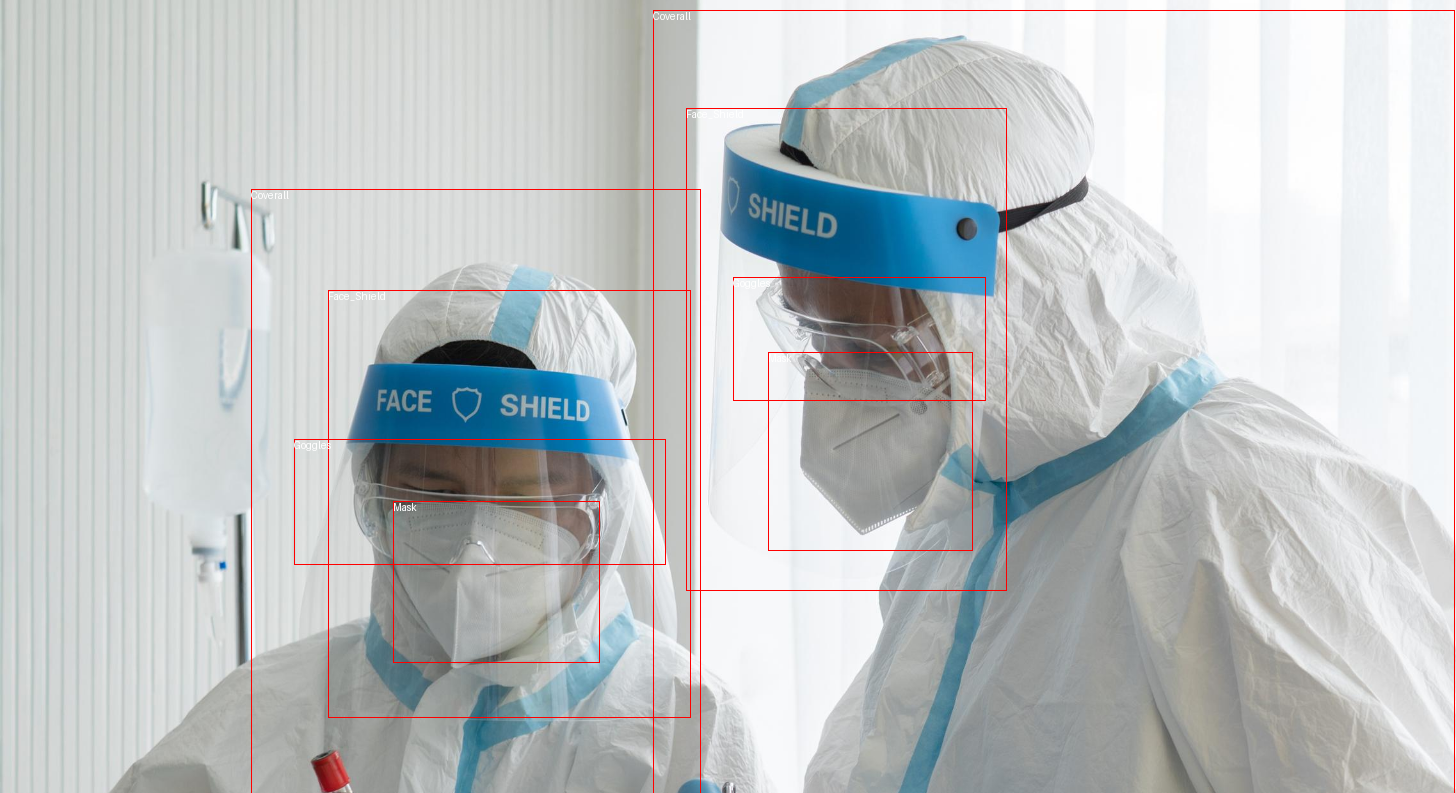

In [49]:
draw=ImageDraw.Draw(sample['image'])
box=sample['objects']['bbox']
width=sample['width']
height=sample['height']
for i in range(len(box)):
    x,y,w,h=tuple(box[i])
    x1=int(x*width)
    y1=int(y*height)
    x2=int((x+w)*width)
    y2=int((y+h)*height)
    draw.rectangle((x1,y1,x2,y2), outline='red', width=1)
    draw.text((x1,y1), id2label[sample['objects']['category'][i]], fill='black')
sample['image']
    

In [45]:
id2label[sample['objects']['category'][i]]

'Coverall'

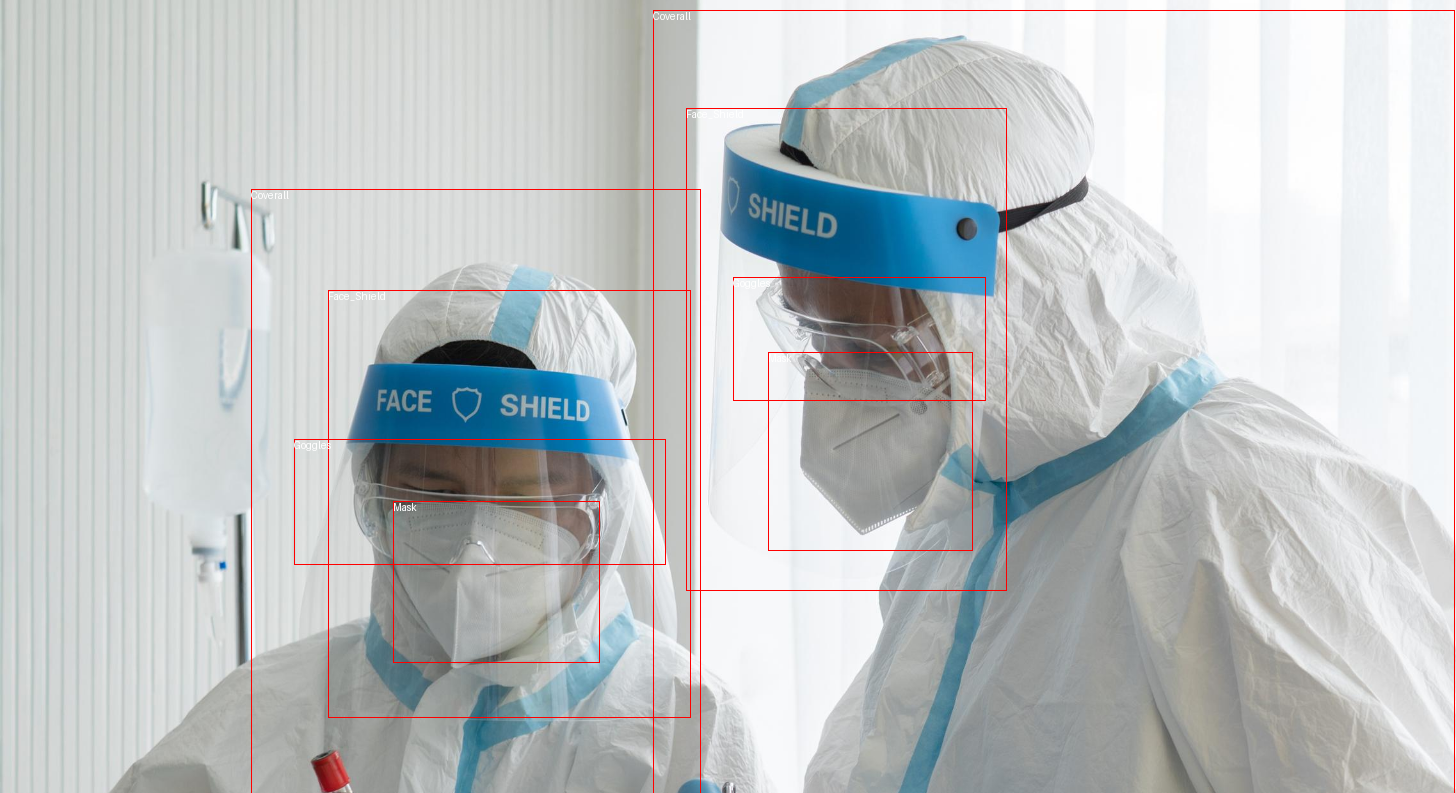